# prediction of car prices

- 자동차 가격을 예측하는데 중요한 변수는 무엇인가?

- 이 변수들은 자동차 가격을 얼마나 잘 설명 하는가?

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [5]:
df=pd.DataFrame(pd.read_csv("C:\\Users\\hsgb2\\PycharmProjects\\minicharm\\python_ML\\DataCB\\source\\CarPrice_Assignment.csv"))

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.shape

(205, 26)

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data Cleaning

In [11]:
#중복된 데이터 찾기
sum(df.duplicated(subset='car_ID')) ==0 

True

In [12]:
#Null 값 확인
df.isnull().sum()*100/df.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [13]:
#price:Target Variable
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

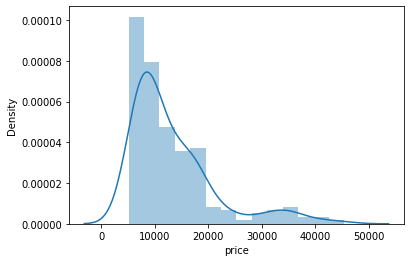

In [14]:
sns.distplot(df['price'])

- 표준편차가 크다 (자동차 가격에 상당한 차이가 있다)

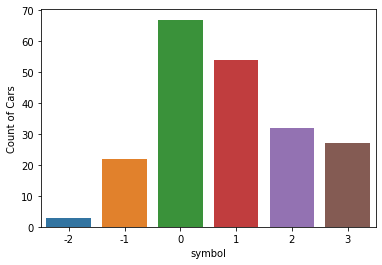

<Figure size 432x288 with 0 Axes>

In [15]:
plt1=sns.countplot(df['symboling'])
plt1.set(xlabel='symbol',ylabel='Count of Cars')
plt.show()
plt.tight_layout()

- car_ID:unique ID 이다.(primary key)
- symboling : +3이면 위험등급이고,-3 이면 꽤 안전하다는 것을 의미하는 보험위험등급을 나타냄

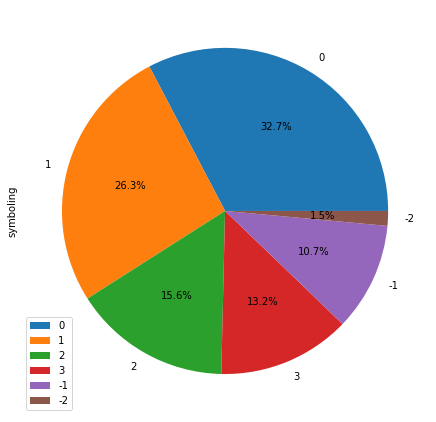

<Figure size 432x288 with 0 Axes>

In [18]:
df_sym=pd.DataFrame(df['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels=df_sym.index.values,autopct='%1.1f%%'
               ,figsize=(15,7.5))
plt.gca().set_aspect('equal') #(x,y)축의 비율을 동일하게 만든다.
plt.show()
plt.tight_layout()

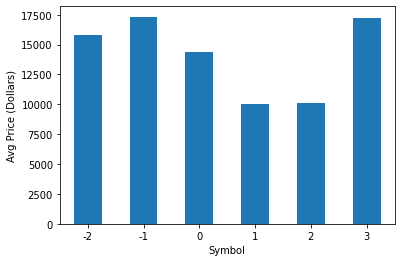

In [20]:
plt1=df[['symboling','price']].groupby("symboling").mean().plot(kind='bar'
                                                               ,legend=False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation=0)
plt.show()

- 차의 50% 이상의 symbol이 0 또는 1이다.
- 차의 평균 가격은 symbol 0,1,2에서 낮다.

### Car Name

In [21]:
df.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

- Car Name은 두개의 구성으로 나눠져있다.'Car company'+''+'Car Model'

In [22]:
df['brand']=df.CarName.str.split(' ').str.get(0).str.upper()

In [23]:
len(set(df.brand.values))

27

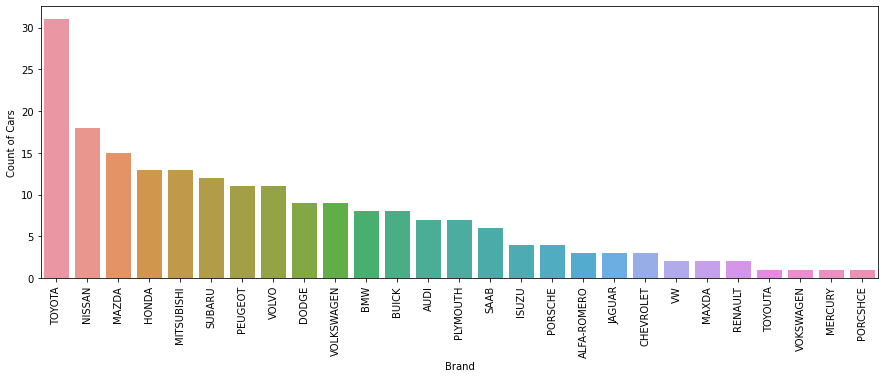

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax =plt.subplots(figsize=(15,5))
plt1=sns.countplot(df['brand'],order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel='Brand',ylabel='Count of Cars')
xticks(rotation=90)
plt.show()
plt.tight_layout()

- 'VOLKSWAGON'는 VOLKSWAGEN,VOKSWAGEN,VW 세가지 종류로 나뉜다.
- 'MAZDA'는 MAXDA라고도 한다.
- 'PORSCHE'는 PORSCHE,PORCSHE


In [26]:
df['brand']=df['brand'].replace(['VW','VOKSWAGEN'],'VOLKSWAGEN')
df['brand']=df['brand'].replace(['MAXDA'],'MAZDA')
df['brand']=df['brand'].replace(['PORCSHCE'],'PORSCHE')
df['brand']=df['brand'].replace(['TOYOUTA'],'TOYOTA')

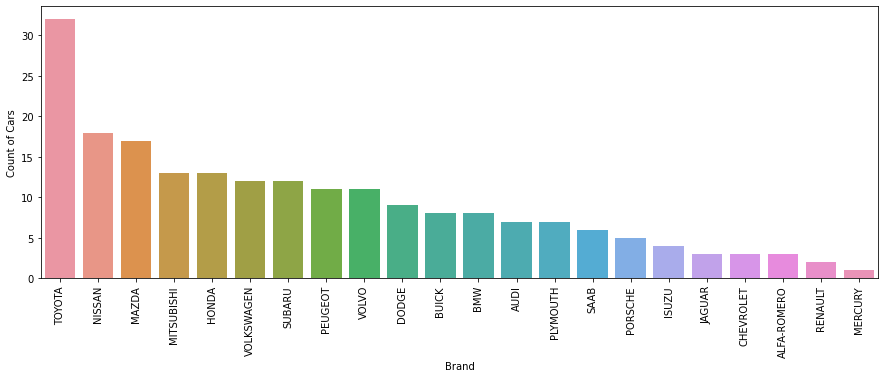

<Figure size 432x288 with 0 Axes>

In [28]:
fig,ax=plt.subplots(figsize=(15,5))
plt1=sns.countplot(df['brand'],order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel='Brand',ylabel='Count of Cars')
xticks(rotation=90)
plt.show()
plt.tight_layout()

In [29]:
df.brand.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: brand, dtype: object

- Toyota는 일본 회사 중에서 가장 많은 모델을 보유하고 있다.

<function matplotlib.pyplot.show(close=None, block=None)>

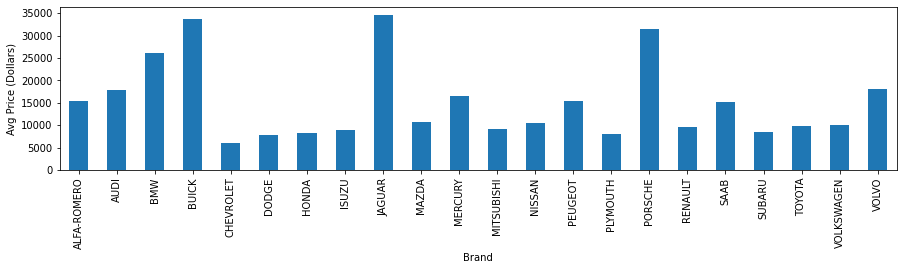

In [30]:
df_comp_avg_price=df[['brand','price']].groupby("brand",as_index=False).mean().rename(columns={'price':'brand_avg_price'})
# df_comp_avg_price에 brand,price를 groupby함수로 이용하여  key 값은 price, value는  price의 평균 값으로 구성한다.
plt1=df_comp_avg_price.plot(x='brand',kind='bar',legend=False,sort_columns=True,figsize=(15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation=90)
plt.show

In [31]:
df_comp_avg_price

,brand,brand_avg_price
0,ALFA-ROMERO,15498.333333
1,AUDI,17859.166714
2,BMW,26118.750000
3,BUICK,33647.000000
4,CHEVROLET,6007.000000
5,DODGE,7875.444444
6,HONDA,8184.692308
7,ISUZU,8916.500000
8,JAGUAR,34600.000000
9,MAZDA,10652.882353


In [37]:
df=df.merge(df_comp_avg_price,on='brand') #df_comp_avg_price의 고유 값을 병합한다.

In [38]:
df['brand_category']= df['brand_avg_price'].apply(lambda x : "Budget" if x < 10000
                                                    else ("Mid_Range" if 10000 <= x<20000
                                                         else "Luxury"))

- Toyota 는 시장에서 상당히 많은 차종을 보유하고 있다?
- Brand는 각자의 평균 가격에 따라 Luxury, Mid Ranged, Budget으로 분류 될 수 있다.

### Fuel Type

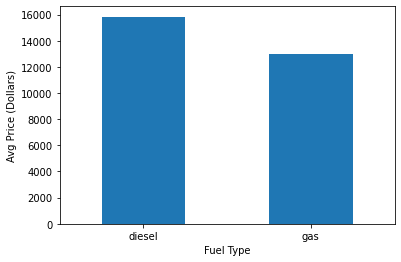

In [39]:
df_fuel_avg_price=df[['fueltype','price']].groupby("fueltype",as_index=False).mean().rename(columns={'price':'fuel_avg_price'})
plt1=df_fuel_avg_price.plot(x='fueltype',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation=0)
plt.show()

### Aspiration

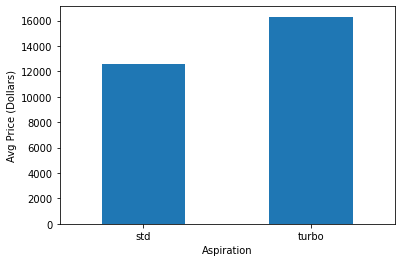

In [41]:
df_aspir_avg_price=df[['aspiration','price']].groupby("aspiration",as_index=False).mean().rename(columns={'price':'aspir_avg_price'})
plt1=df_aspir_avg_price.plot(x='aspiration',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- turbo 엔진이 평범한 엔진보다 가격이 비싼 것을 알 수 있다.

### Door Numbers

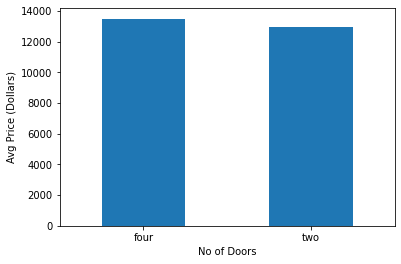

In [42]:
df_door_avg_price=df[['doornumber','price']].groupby("doornumber",as_index=False).mean().rename(columns={'price':'door_avg_price'})
plt1=df_door_avg_price.plot(x='doornumber',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- 문의 갯수는 가격에 영향을 많이 끼치지 않는 것 같다.

### Car Body

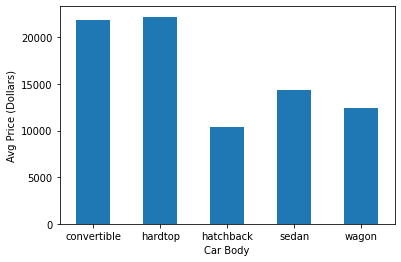

In [44]:
df_body_avg_price=df[['carbody','price']].groupby("carbody",as_index=False).mean().rename(columns={'price':'carbody_avg_price'})
plt1=df_body_avg_price.plot(x='carbody',kind='bar',legend=False,sort_columns=True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- Hardtop과 convertible은 가장 비싸다. 그에 비해 hatchback은 가장 싸다.

### Drivewheel

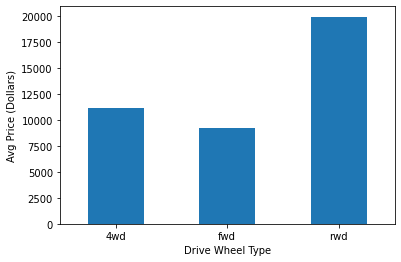

In [46]:
df_drivewheel_avg_price=df[['drivewheel','price']].groupby("drivewheel",as_index=False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1=df_drivewheel_avg_price.plot(x='drivewheel',kind='bar',legend=False,sort_columns=True,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

- 후륜기동차량이 가격이 더 높다.

### Wheel base

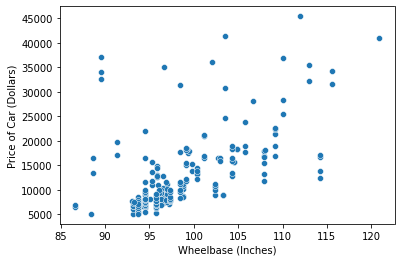

In [47]:
plt1=sns.scatterplot(x='wheelbase',y='price',data=df)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

- 대부분의 차들은 95인치 정도의 휠베이스를 갖고 있다.
- 가격은 휠베이스와 양의 상관관계를 갖고 있다.

### Car Dimensions